In [1]:
from model import CrackImputer
from dataset import CrackDataModule, CrackDataset
from database_handler import DatabaseHandler
import pytorch_lightning as pl
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# load all data using a function defined in the DataBaseHandler custom library
# db_handler is an object
db_handler = DatabaseHandler(r"C:\Users\TimVos\VSC Projects\Crack prediction\sensor_data.db")
# db_handler.load_all_data() returns a pandas dataframe, which is stored in the db_handler object.
db_handler.load_all_data()


INFO:database_handler:Database path set to: C:\Users\TimVos\VSC Projects\Crack prediction\sensor_data.db
INFO:database_handler:🗄 Connected to APSW database at C:\Users\TimVos\VSC Projects\Crack prediction\sensor_data.db
c:\Users\TimVos\VSC Projects\Crack prediction\database_handler.py:65: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM sensor_values", conn)


,datetime,Vbatt,Temp.,Press.,Channel 1,Temperature 1,Channel 2,Temperature 2,Channel 3,Temperature 3,...,CH7 Raw,CH8 Raw,Channel 1 crack profile,Channel 2 crack profile,Channel 3 crack profile,Channel 4 crack profile,Channel 5 crack profile,Channel 6 crack profile,Channel 7 crack profile,Channel 8 crack profile
0,2025-01-17 17:04:00,5.0,35.1,992.3,3752.0,34.6,2604.7,34.0,3553.6,33.4,...,2817.4,3095.8,-0.204130,-0.003719,0.330440,None,0.000000,0.027170,-0.002905,-0.001172
1,2025-01-17 17:19:00,4.9,33.5,992.5,3747.3,34.4,2603.1,33.6,3552.8,33.3,...,2818.0,3096.2,-0.217529,-0.008297,0.328151,None,0.001167,0.027170,-0.001162,0.000000
2,2025-01-17 17:34:00,4.9,32.9,992.1,3744.6,34.0,2603.4,33.4,3550.2,33.1,...,2818.4,3096.2,-0.225227,-0.007439,0.320713,None,0.002043,0.026284,0.000000,0.000000
3,2025-01-17 17:49:00,4.9,32.5,992.3,3740.4,33.6,2603.4,33.1,3549.5,32.9,...,2818.7,3096.2,-0.237201,-0.007439,0.318710,None,0.003211,0.044004,0.000872,0.000000
4,2025-01-17 18:04:00,4.9,32.1,992.4,3738.4,33.4,2603.4,32.9,3557.8,32.7,...,2819.0,3096.2,-0.242903,-0.007439,0.342456,None,0.004086,0.050206,0.001743,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16394,2025-07-07 11:04:00,3.1,37.0,1011.6,3768.3,29.7,2602.7,34.6,3422.5,31.2,...,2825.1,3104.3,-0.157659,-0.009441,-0.044631,None,0.011091,-0.007088,0.019466,0.023724
16395,2025-07-07 11:19:00,3.0,36.9,1011.5,3768.6,29.9,2604.7,37.3,3423.2,31.3,...,2825.1,3104.3,-0.156804,-0.003719,-0.042628,None,0.011091,-0.007088,0.019466,0.023724
16396,2025-07-07 12:19:00,1.8,34.0,1010.5,3746.5,28.1,2604.4,27.9,3418.4,29.7,...,2825.4,3104.6,-0.219810,-0.004578,-0.056361,None,0.012258,-0.002953,0.020337,0.024603
16397,2025-07-07 12:34:00,1.7,35.3,1010.4,3747.7,28.2,2605.0,27.9,3418.4,29.5,...,2825.1,3104.3,-0.216389,-0.002861,-0.056361,None,0.012258,-0.004135,0.019466,0.023724


In [11]:
# Let's fetch only Channel 1 crack profile data for simplicity

# Get the absolute earliest and latest dates from the database
start_date = db_handler.get_earliest_datetime()
end_date = db_handler.get_latest_datetime()

if start_date and end_date:
    print(f"Found earliest date: {start_date}")
    print(f"Found latest date: {end_date}")

    # Now, query the data using these dynamic dates
    used_data = db_handler.query_data(
        start_date=start_date.isoformat(),
        end_date=end_date.isoformat(),
        selected_columns=["Channel 1 crack profile", "Temperature 1"]
    )
    print("Queried data:")
    print(used_data.head())
    # Now, query the data using these dynamic dates

else:
    print("Could not retrieve date range. The database or table might be empty.")

INFO:database_handler:🗄 Connected to APSW database at C:\Users\TimVos\VSC Projects\Crack prediction\sensor_data.db
c:\Users\TimVos\VSC Projects\Crack prediction\database_handler.py:92: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query("SELECT MIN(datetime) as min_dt FROM sensor_values", conn)
INFO:database_handler:🗄 Connected to APSW database at C:\Users\TimVos\VSC Projects\Crack prediction\sensor_data.db
c:\Users\TimVos\VSC Projects\Crack prediction\database_handler.py:78: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result = pd.read_sql_query("SELECT MAX(datetime) as max_dt FROM sensor_values", conn)
INFO:database_handler:🗄 Connected to APSW database a

Found earliest date: 2025-01-17 17:04:00
Found latest date: 2025-07-11 12:04:00
Queried data:
             datetime  Channel 1 crack profile  Temperature 1
0 2025-01-18 00:04:00                -0.352666           30.3
1 2025-01-18 00:19:00                -0.376899           30.2
2 2025-01-18 00:34:00                -0.378039           29.5
3 2025-01-18 00:49:00                -0.401987           28.8
4 2025-01-18 01:04:00                -0.411966           28.5


c:\Users\TimVos\VSC Projects\Crack prediction\database_handler.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  all_cols = pd.read_sql_query("PRAGMA table_info(sensor_values);", conn)["name"].tolist()
c:\Users\TimVos\VSC Projects\Crack prediction\database_handler.py:52: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn, params=(start_date, end_date))


In [12]:
used_data.sort_index(inplace=True)
used_data

,datetime,Channel 1 crack profile,Temperature 1
0,2025-01-18 00:04:00,-0.352666,30.3
1,2025-01-18 00:19:00,-0.376899,30.2
2,2025-01-18 00:34:00,-0.378039,29.5
3,2025-01-18 00:49:00,-0.401987,28.8
4,2025-01-18 01:04:00,-0.411966,28.5
...,...,...,...
16366,2025-07-07 11:04:00,-0.157659,29.7
16367,2025-07-07 11:19:00,-0.156804,29.9
16368,2025-07-07 12:19:00,-0.219810,28.1
16369,2025-07-07 12:34:00,-0.216389,28.2


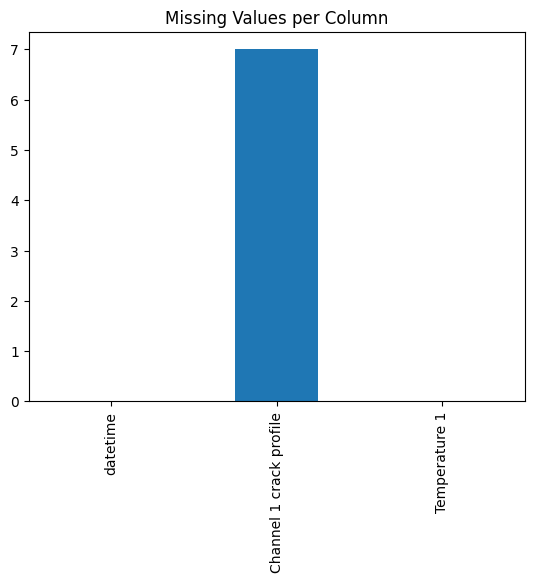

In [13]:
# check for missing values
used_data.isnull().sum().plot(kind='bar', title='Missing Values per Column')
plt.show()

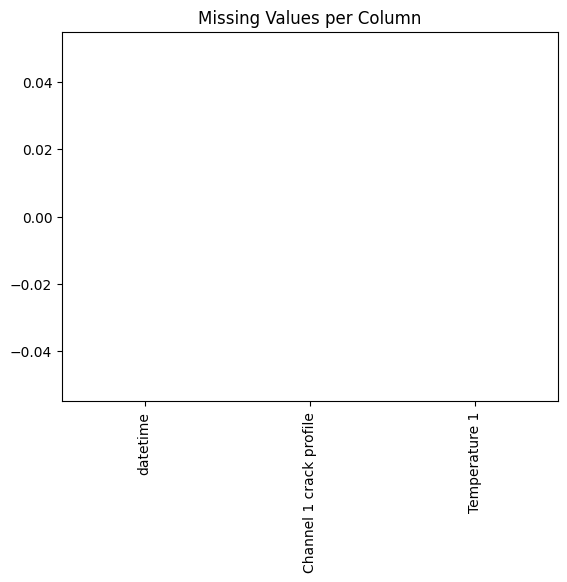

                 datetime  Channel 1 crack profile  Temperature 1
0     2025-01-18 00:04:00                -0.352666           30.3
1     2025-01-18 00:19:00                -0.376899           30.2
2     2025-01-18 00:34:00                -0.378039           29.5
3     2025-01-18 00:49:00                -0.401987           28.8
4     2025-01-18 01:04:00                -0.411966           28.5
...                   ...                      ...            ...
16366 2025-07-07 11:04:00                -0.157659           29.7
16367 2025-07-07 11:19:00                -0.156804           29.9
16368 2025-07-07 12:19:00                -0.219810           28.1
16369 2025-07-07 12:34:00                -0.216389           28.2
16370 2025-07-11 12:04:00                -0.206411           28.3

[16371 rows x 3 columns]


In [15]:
# we interplate missing values for temperature, the pandas linear way
used_data['Channel 1 crack profile'] = used_data['Channel 1 crack profile'].interpolate(method='linear')

# and check for missing values again
used_data.isnull().sum().plot(kind='bar', title='Missing Values per Column')
plt.show()

print(used_data)


In [17]:
# Interpolation/imputation using machine learning
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the split ratios
train_size = 0.8
val_size = 0.1
test_size = 0.1

# Calculate the number of rows for each split
n_rows = len(used_data)
n_train = int(n_rows * train_size)
n_val = int(n_rows * val_size)

# Create the splits chronologically
train_df = used_data.iloc[:n_train]
val_df = used_data.iloc[n_train:n_train + n_val]
test_df = used_data.iloc[n_train + n_val:]

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Testing set size: {len(test_df)}")

Training set size: 13096
Validation set size: 1637
Testing set size: 1638


In [18]:
# 2. Add the 'time_in_minutes' feature to the DataFrame
used_data['time_in_minutes'] = (used_data['datetime'] - used_data['datetime'].iloc[0]).dt.total_seconds() / 60
used_data


,datetime,Channel 1 crack profile,Temperature 1,time_in_minutes
0,2025-01-18 00:04:00,-0.352666,30.3,0.0
1,2025-01-18 00:19:00,-0.376899,30.2,15.0
2,2025-01-18 00:34:00,-0.378039,29.5,30.0
3,2025-01-18 00:49:00,-0.401987,28.8,45.0
4,2025-01-18 01:04:00,-0.411966,28.5,60.0
...,...,...,...,...
16366,2025-07-07 11:04:00,-0.157659,29.7,245460.0
16367,2025-07-07 11:19:00,-0.156804,29.9,245475.0
16368,2025-07-07 12:19:00,-0.219810,28.1,245535.0
16369,2025-07-07 12:34:00,-0.216389,28.2,245550.0


In [ ]:
from pytorch_lightning.loggers import TensorBoardLogger # Import this instead
from pytorch_lightning.callbacks import ModelCheckpoint

# Define features and instantiate the DataModule
INPUT_FEATURES = ['time_in_minutes', 'Temperature 1']
TARGET = 'Channel 1 crack profile'
WINDOW_SIZE = 12
BATCH_SIZE = 32

# Pass the DataFrame directly to the DataModule
data_module = CrackDataModule(
    data_df=used_data,
    input_cols=INPUT_FEATURES,
    target_col=TARGET,
    window_size=WINDOW_SIZE,
    batch_size=BATCH_SIZE
)

# Instantiate the model
INPUT_SIZE = len(INPUT_FEATURES)
HIDDEN_SIZE = 50
NUM_LAYERS = 2
model = CrackImputer(INPUT_SIZE, HIDDEN_SIZE, NUM_LAYERS)


# Use TensorBoardLogger 
logger = TensorBoardLogger(save_dir="tb_logs/", name="crack_imputer_model")

# Define a Checkpoint callback so that our best model gets saved under the checkpoints folder. 
checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    dirpath='checkpoints/',
    filename='best-model',
    save_top_k=1,
    mode='min'
)

# Instantiate the Trainer and start training.
# noting that we are training an LSTM
trainer = pl.Trainer(
    max_epochs=10,
    accelerator="auto",
    logger=logger,                  # Use the TensorBoard logger
    callbacks=[checkpoint_callback]
)

trainer.fit(model, datamodule=data_module)


💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\TimVos\VSC Projects\Crack prediction\.venv\Lib\site-packages\pytorch_lightning\trainer\configuration_validator.py:68: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.

  | Name | Type   | Params | Mode 
----------------------------------------
0 | lstm | LSTM   | 31.2 K | train
1 | fc   | Linear | 51     | train
----------------------------------------
31.3 K    Trainable params
0         Non-trainable params
31.3 K    Total params
0.125     Total estimated model params size (MB)
2         Modules in train mode
0         Modules in eval mode
c:\Users\TimVos\VSC Projects\Crack prediction\.venv\Lib\site-packages\pytorch_lightning\train

Epoch 0:   3%|▎         | 14/409 [00:00<00:04, 85.71it/s, v_num=1]

c:\Users\TimVos\VSC Projects\Crack prediction\model.py:27: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = nn.functional.mse_loss(y_hat, y) # Mean Squared Error is a good loss function for regression


Epoch 1:   3%|▎         | 13/409 [00:00<00:05, 72.42it/s, v_num=1] 

c:\Users\TimVos\VSC Projects\Crack prediction\model.py:27: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = nn.functional.mse_loss(y_hat, y) # Mean Squared Error is a good loss function for regression


Epoch 9: 100%|██████████| 409/409 [00:06<00:00, 60.18it/s, v_num=1]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 409/409 [00:06<00:00, 60.07it/s, v_num=1]


In [ ]:
# WORK IN PROGRESS


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

# After trainer.fit() has finished...

# 1. Define the path to the TensorBoard log file
# Note: The path is to the file itself, not just the directory.
log_file = "tb_logs/crack_imputer_model/version_0/events.out.tfevents.1663600000.hostname" # Your filename will be different

# 2. Use the EventAccumulator to load the data
ea = event_accumulator.EventAccumulator(log_file)
ea.Reload() # This loads the events from the file

# 3. Extract the validation loss into a pandas DataFrame
# The ea.Scalars() method returns all scalar metrics you logged.
val_loss_df = pd.DataFrame(ea.Scalars('val_loss'))

# 4. Plot the results
sns.lineplot(data=val_loss_df, x='step', y='value', label='Validation Loss')
plt.title('Model Validation Loss')
plt.xlabel('Step')
plt.ylabel('Loss (MSE)')
plt.grid(True)
plt.show()

None
